## Demonstration where correlations might not tell the truth due to lack of linearity

In [35]:
# usual imports
import numpy as np
import pandas as pd
import seaborn as sns
import phik

In [36]:
# ChatGPT used to generate some of the NumPy generating codes
# "create a NumPy list of values, x axis are week numbers (1-52) and y are 
# continuous sales values. have a rising trend towards the middle of the year, and then
# and equal decreasing trend towards the end of the year"

# random seed locked so we always get the same data
np.random.seed(512)

# generate imaginary "summer season data"
x = 105.5 + np.linspace(0, 20, 52)

# try also: y = np.sin(x / 5.0) + np.random.rand(len(x)) * 0.15 + 2
# which is more linear line than this
y = np.sin(x / 3.5) + np.random.rand(len(x)) * 0.15 + 2
y = y * 50000

In [37]:
# convert x/y values into a pandas DataFrame (for seaborn)
df = pd.DataFrame({'WeekNo': x, 'SalesEUR': y})
df['SalesEUR'] = df['SalesEUR'].astype(int)
df['WeekNo'] = df.index + 1
df['WeekNo'] = df['WeekNo'].astype(int)
df.head()

,WeekNo,SalesEUR
0,1,53004
1,2,55728
2,3,59563
3,4,62451
4,5,63912


<Axes: xlabel='WeekNo', ylabel='SalesEUR'>

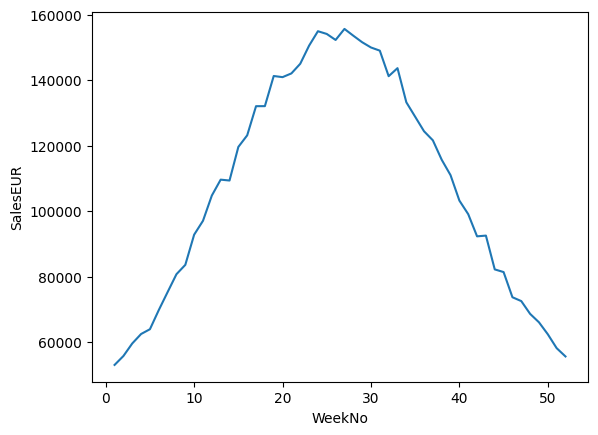

In [38]:
sns.lineplot(x="WeekNo", y="SalesEUR", data=df)

In [39]:
# let's check the correlations
# as we can see, even though there is a clear trend with seaborn
# correlation is virtually 0 => implies there's no connection
# this is the limitation of correlations, when the connection is NOT LINEAR
df.corr(numeric_only=True)

,WeekNo,SalesEUR
WeekNo,1.000000,-0.001563
SalesEUR,-0.001563,1.000000


In [40]:
# the classic way is to solve this visually, e.g. seaborn
# another option is to use ASSOCIATIONS -> phik-matrix
# this is feature we study in more detail in Advanced Data Analytics

# pip install phik
# also import phik in the top of the notebook

# other than, phik-matrix integrates into your DataFrames
# and you can print it out like this
df.phik_matrix()

interval columns not set, guessing: ['WeekNo', 'SalesEUR']


,WeekNo,SalesEUR
WeekNo,1.000000,0.930084
SalesEUR,0.930084,1.000000


### Remember: phik-matrix looks like a correlation matrix, but it's actually an ASSOCIATION MATRIX

### Let's try another trend

In [41]:
# ChatGPT used to generate some of the NumPy generating codes
# "create a NumPy list of values, x axis are week numbers (1-52) and y are 
# continous sales values. have slightly decreasing sales from weeks 1 to 5,
# then stable sales until week 35
# and finally have a rising trend towards week 52"

# Generate x values (week numbers)
x = np.arange(1, 53)

# Generate y values for decreasing sales from weeks 1 to 5
y_decreasing = np.linspace(230000, 100000, 5) + np.random.randint(-15000, 15000, 5)

# Generate y values for stable sales from weeks 5 to 35
y_stable = np.random.randint(200000, 220000, 35) - 100000

# Generate y values for steadily rising sales from weeks 40 to 52
y_rising = np.linspace(100000, 400000, 12) + np.random.randint(-15000, 15000, 12)

# Concatenate y values
y = np.concatenate((y_decreasing, y_stable, y_rising))

In [42]:
# convert x/y values into a pandas DataFrame (for seaborn)
df = pd.DataFrame({'WeekNo': x, 'SalesEUR': y})
df['SalesEUR'] = df['SalesEUR'].astype(int)
df['WeekNo'] = df.index + 1
df['WeekNo'] = df['WeekNo'].astype(int)
df.head()

,WeekNo,SalesEUR
0,1,218237
1,2,188937
2,3,156794
3,4,129383
4,5,91410


<Axes: xlabel='WeekNo', ylabel='SalesEUR'>

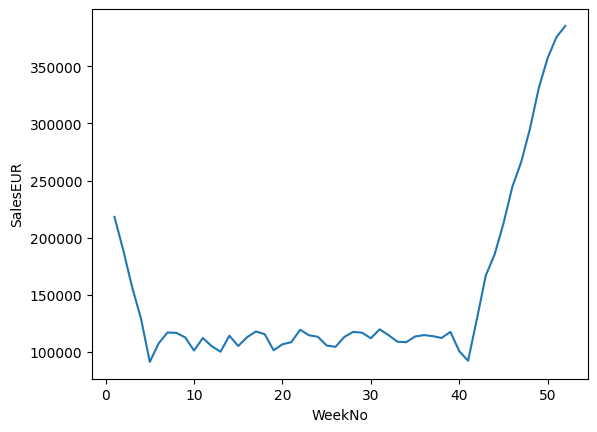

In [43]:
sns.lineplot(x="WeekNo", y="SalesEUR", data=df)

In [44]:
# correlation matrix
df.corr(numeric_only=True)

,WeekNo,SalesEUR
WeekNo,1.000000,0.552178
SalesEUR,0.552178,1.000000


In [45]:
# phik-matrix also
df.phik_matrix()

interval columns not set, guessing: ['WeekNo', 'SalesEUR']


,WeekNo,SalesEUR
WeekNo,1.000000,0.449751
SalesEUR,0.449751,1.000000
